In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_utils import RadiographyDataset, train_model, produce_stats
from model import ViT

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])

In [4]:
train_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="train")
test_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="test")
val_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="val")

In [5]:
trainloader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, num_workers=8, shuffle=False)
valloader = DataLoader(val_dataset, batch_size=32, num_workers=8, shuffle=False)

In [6]:
model = ViT().to(device)

c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.8779, Val Loss: 0.6963


Epoch 2/10, Train Loss: 0.6095, Val Loss: 0.5277


Epoch 3/10, Train Loss: 0.4967, Val Loss: 0.4616


Epoch 4/10, Train Loss: 0.4415, Val Loss: 0.4320


Epoch 5/10, Train Loss: 0.3902, Val Loss: 0.4030


Epoch 6/10, Train Loss: 0.3574, Val Loss: 0.4589


Epoch 7/10, Train Loss: 0.3233, Val Loss: 0.5189


Epoch 8/10, Train Loss: 0.3083, Val Loss: 0.4377


Epoch 9/10, Train Loss: 0.2749, Val Loss: 0.3881


Epoch 10/10, Train Loss: 0.2503, Val Loss: 0.4189


Test Loss: 0.4462, Test Accuracy: 0.8312


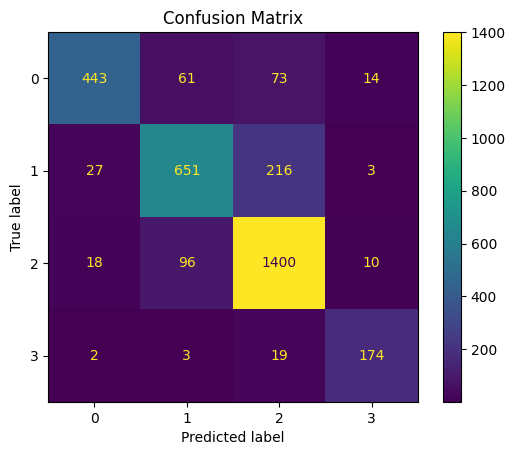

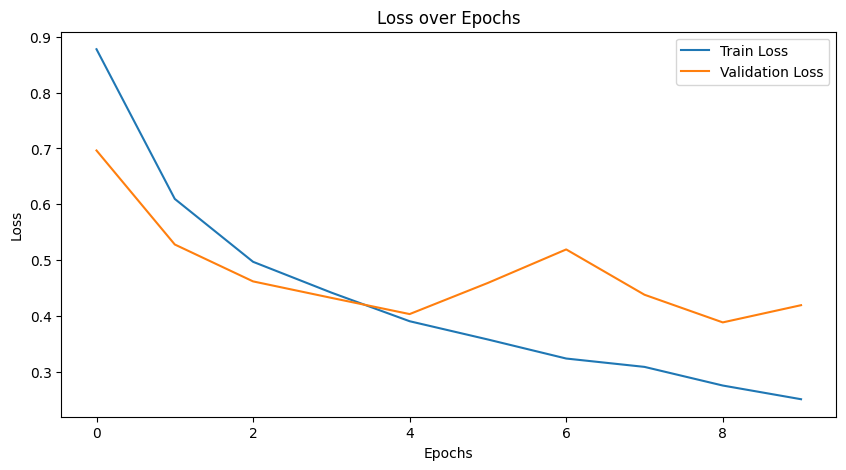

In [7]:
model_trained, train_loss_, val_loss_ = train_model(model, trainloader, valloader, device)
model_dict = produce_stats(model_trained, testloader, train_loss_, val_loss_, device)

In [9]:
torch.save(model, "model/vit_pretrained.pt")

In [8]:
model = ViT(pretrained=False, freeze=False).to(device)

c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
model_trained, train_loss_, val_loss_ = train_model(model, trainloader, valloader, device)
model_dict = produce_stats(model_trained, testloader, train_loss_, val_loss_, device)

Epoch 1/10, Train Loss: 1.2705, Val Loss: 1.0955


Epoch 2/10 - Training:  95%|█████████▍| 441/465 [09:56<00:30,  1.26s/it]

In [ ]:
torch.save(model, "model/vit_nonpretrained.pt")